## Sim Demo

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from env.imports import *

  import numpy.matlib as npm

  autumn = cm.get_cmap('autumn', 256)

  winter = cm.get_cmap('winter_r', 256)



In [10]:
import importlib
import data

import models
import sim.sim
import sim.sim_utils
from sim.sim_utils import bytes2human, print_system_usage
from sim.sim import Simulation
from sim.sim_run import single_sim_run

importlib.reload(sim.sim)
importlib.reload(sim.sim_run) 

absolute_root_path /scratch/asr655/neuroinformatics/GeneEx2Conn


<module 'sim.sim_run' from '/scratch/asr655/neuroinformatics/GeneEx2Conn/sim/sim_run.py'>

#### Check job specs

In [11]:
print_system_usage()

total = psutil.disk_usage('/').total
print(bytes2human(total))

CPU Usage: 3.7%
RAM Usage: 2.7%
Available RAM: 1.4T
Total RAM: 1.5T
52.4G


In [12]:
print(os.environ.get("CUDA_VISIBLE_DEVICES"))

# Check available GPUs
print(f"Available GPUs: {torch.cuda.device_count()}")

for i in range(torch.cuda.device_count()):
    print(f"GPU {i}: {torch.cuda.get_device_name(i)} - Memory Allocated: {torch.cuda.memory_allocated(i)/1024**3:.2f} GB")


0
Available GPUs: 1
GPU 0: NVIDIA H100 80GB HBM3 - Memory Allocated: 0.00 GB


In [13]:
print("XGBoost version:", xgboost.__version__)
print("cupy version:", cp.__version__)

GPUtil.getAvailable()

# if a number is seen a GPU is available
GPUtil.getGPUs()

DEVICE_ID_LIST = GPUtil.getFirstAvailable()
DEVICE_ID = DEVICE_ID_LIST[0] # grab first element from list
if DEVICE_ID != None: 
    print('GPU found', DEVICE_ID)
    use_gpu = True

    GPUtil.showUtilization()

XGBoost version: 2.0.3
cupy version: 13.1.0
GPU found 0
| ID | GPU | MEM |
------------------
|  0 |  0% |  0% |


In [14]:
torch.cuda.is_available()

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

## Simulation tests <a id="sims"></a>

### Model Parameter Counts

#### **Linear Models**
- **PCA Bilinear:** 730  _(27 PCs)_
- **PLS Bilinear:** 101  _(10 PLS components)_
- **Bilinear Low-rank:** 73,800  _(rank 10)_
- **PLS MLP:** 158,993  _(10 PLS components, including PLS projection matrices)_
- **PCA MLP:** 47,873  _(27 PCs, 2-layer)_

---

#### **MLP and SMT Models**

#### 2-Layer Models
- **MLP:** 3,812,609
- **SMT:** 1,399,947
- **MLP w/ CLS:** 3,814,145
- **SMT w/ CLS:** 1,405,579

#### 3-Layer Models
- **MLP:** 7,723,777
- **SMT:** 2,162,315
- **MLP w/ CLS:** 7,726,849
- **SMT w/ CLS:** 2,173,067

---

### Coord MLP Parameter Counts
- **[32]:** 321
- **[64, 32]:** 2,753
- **[128, 64]:** 9,601
- **[256, 128]:** 35,685
- **[512, 256, 128]:** 169,729

Number of components for 95% variance PCA: 27
Number of 1s: 36662, Number of 0s: 171274, Class balance (1s): 0.176
Number of 1s: 17738, Number of 0s: 190198, Class balance (1s): 0.085
X shape: (455, 7380)
X_pca shape: (455, 27)
Y_sc shape: (455, 455)
Y_sc_spectralL shape: (455, 455)
Y_sc_spectralA shape: (455, 456)
Y_fc shape: (455, 455)
Coordinates shape: (455, 3)
Y shape (455, 455)
Network coverage: 100.0% of regions
Network sizes: [113, 113, 113, 116]
feature_name:  transcriptome
processing_type:  None
features ['transcriptome']
X generated... expanding to pairwise dataset


wandb: WARNING Malformed sweep config detected! This may cause your sweep to behave in unexpected ways.
wandb: WARNING To avoid this, please fix the sweep config schema violations below:
wandb: WARNING   Violation 1. Additional properties are not allowed ('best_parameters' was unexpected)


Create sweep with ID: 8isqtt6f
Sweep URL: https://wandb.ai/alexander-ratzan-new-york-university/gx2conn/sweeps/8isqtt6f
Initialized sweep with ID: 8isqtt6f


  warnings.warn(



2
3
4
BEST CONFIG {'input_dim': 14760, 'binarize': False, 'activation': 'none', 'learning_rate': 0.0001, 'batch_size': 256, 'regularization': 'l2', 'lambda_reg': 0.001, 'shared_weights': True, 'reduced_dim': 10, 'epochs': 125}
Number of learnable parameters in Bilinear low rank model: 73800
  Linear layer 1: 73800 parameters
Using device: cuda
GPU 0: NVIDIA H100 80GB HBM3 - Memory Allocated: 0.16 GB
Best val loss so far at epoch 1: 0.0355
Best val loss so far at epoch 2: 0.0341
Best val loss so far at epoch 3: 0.0338
Best val loss so far at epoch 4: 0.0329
Epoch 5/125, Train Loss: 0.0222, Val Loss: 0.0336, Time: 2.22s
Best val loss so far at epoch 6: 0.0313
Best val loss so far at epoch 7: 0.0313
Epoch 10/125, Train Loss: 0.0186, Val Loss: 0.0377, Time: 2.05s
Best val loss so far at epoch 15: 0.0310
Epoch 15/125, Train Loss: 0.0173, Val Loss: 0.0310, Time: 2.09s
Epoch 20/125, Train Loss: 0.0150, Val Loss: 0.0379, Time: 2.18s
Epoch 25/125, Train Loss: 0.0129, Val Loss: 0.0318, Time: 2.0

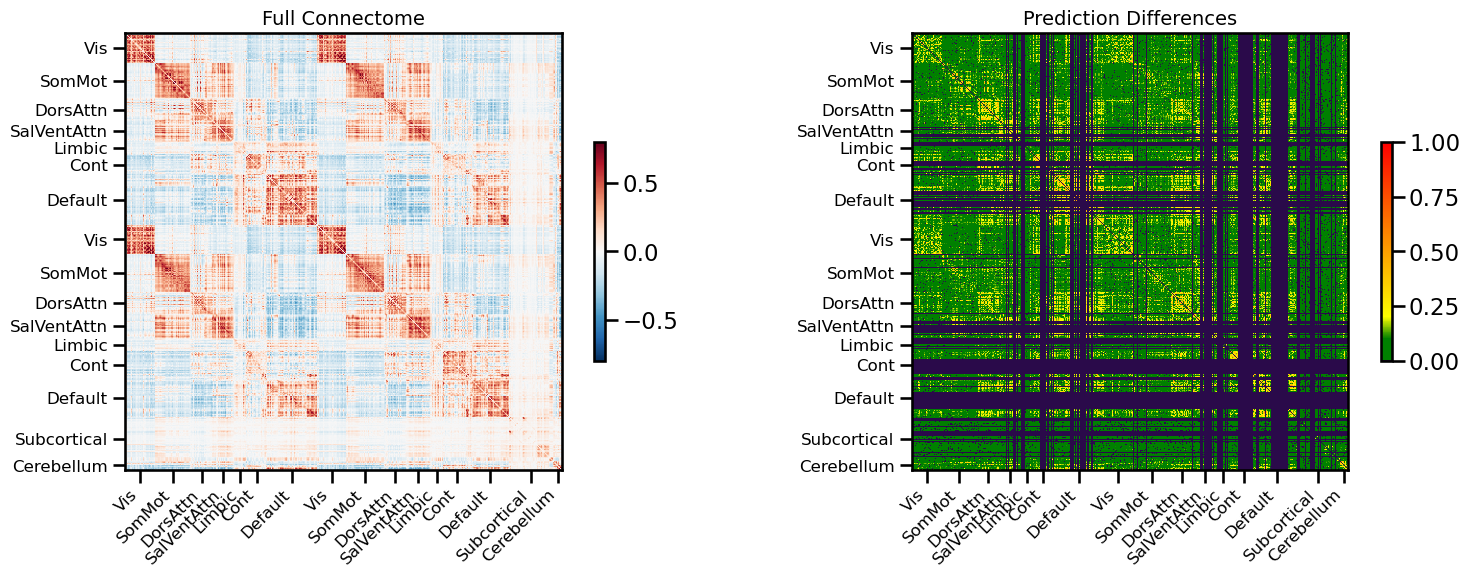

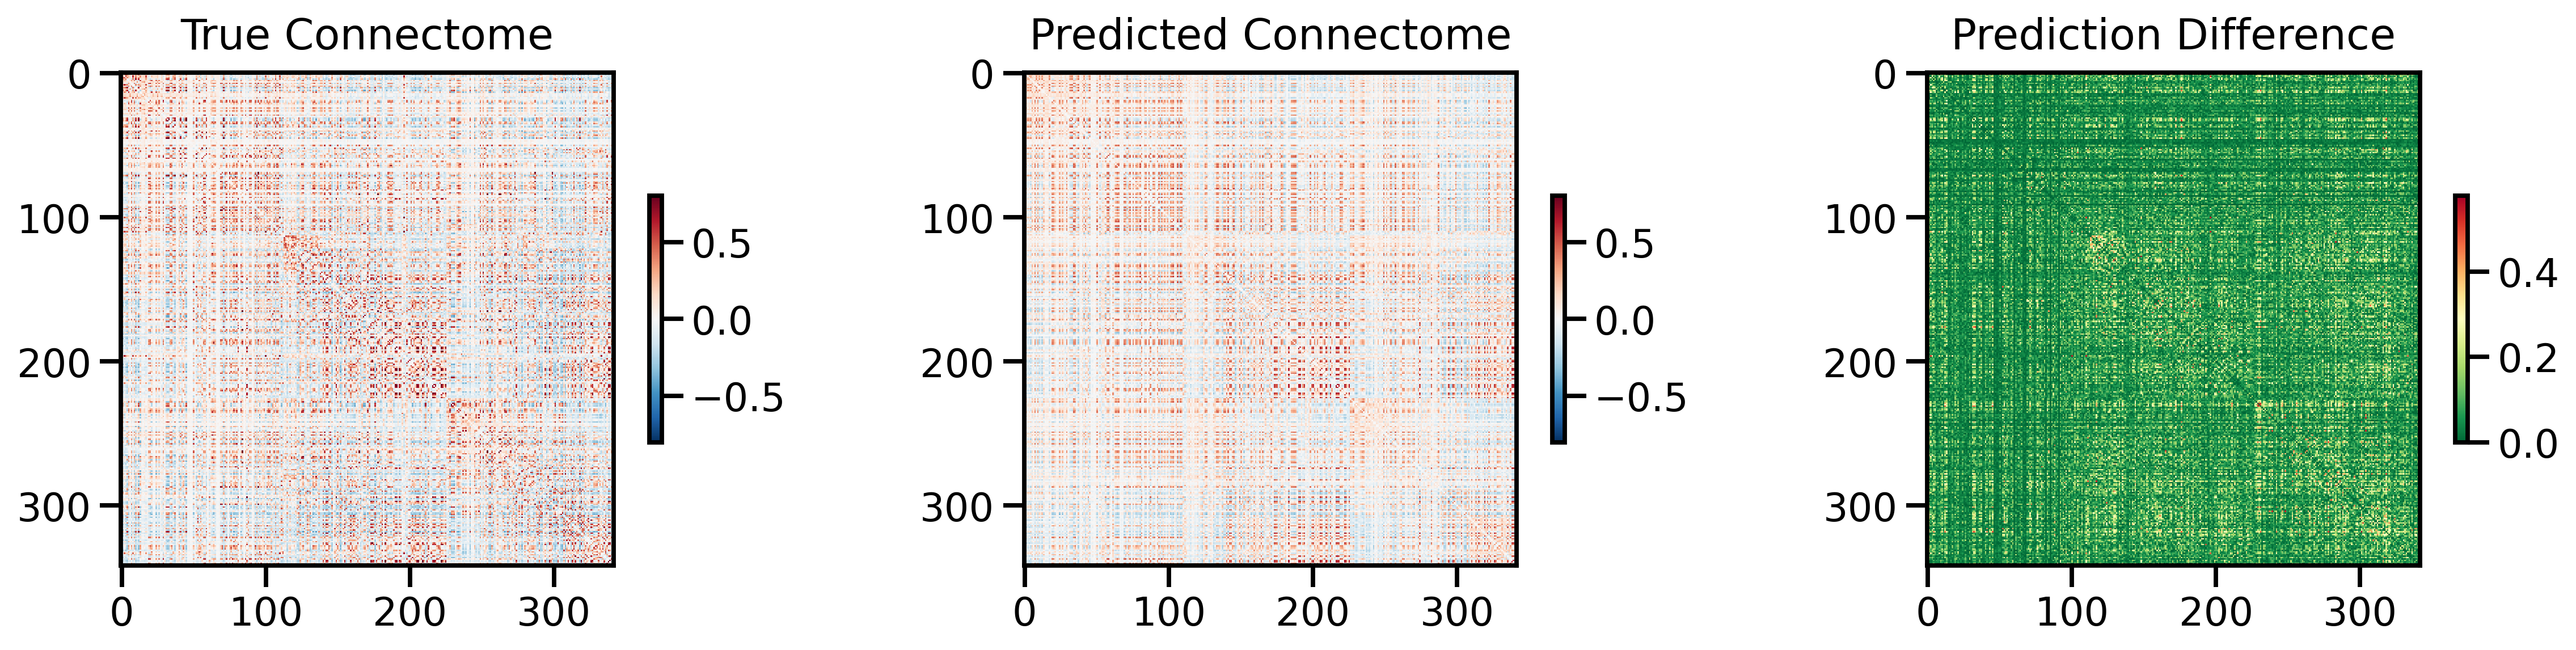

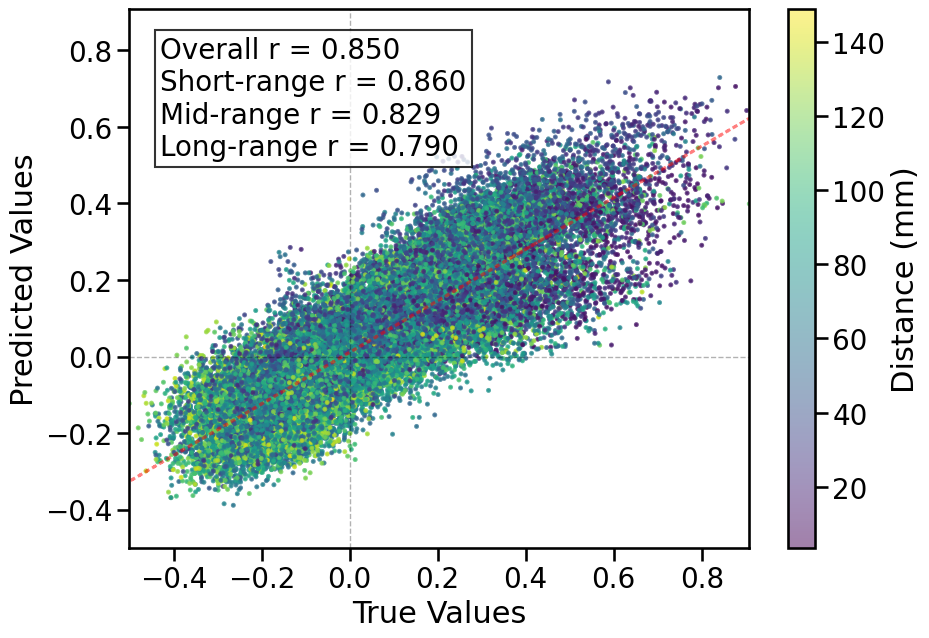

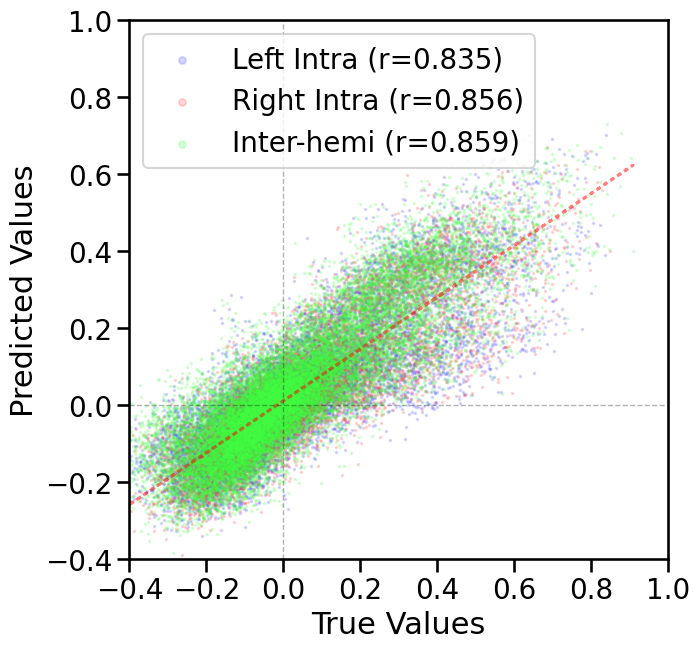

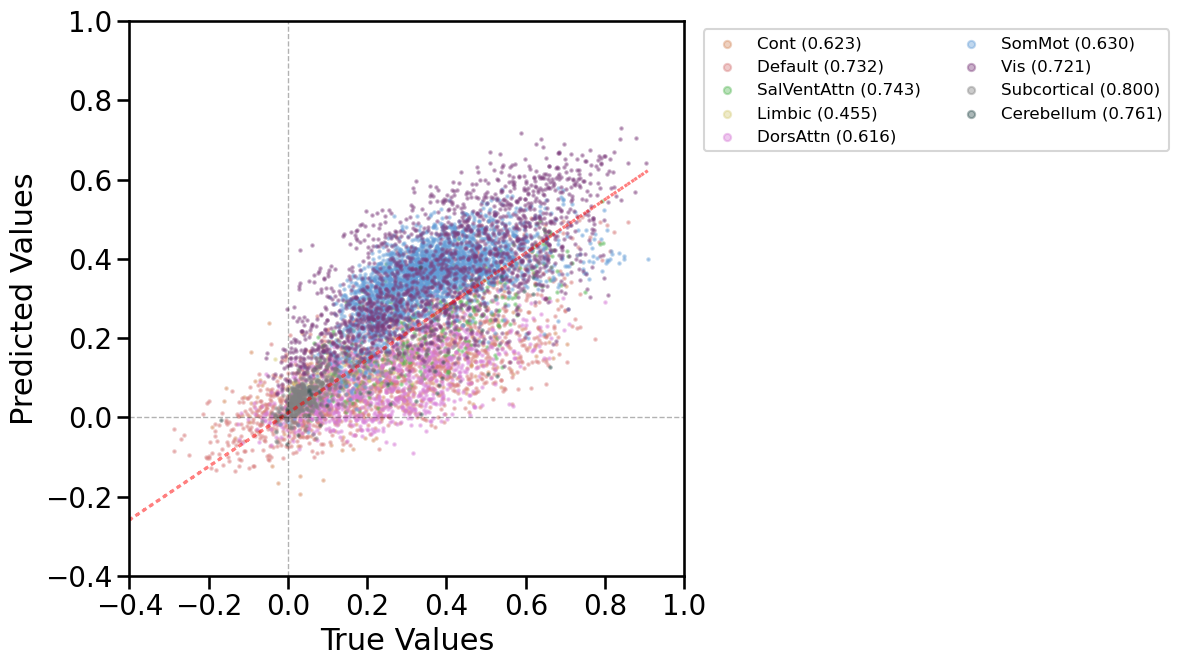

  warnings.warn(stats.ConstantInputWarning(msg))



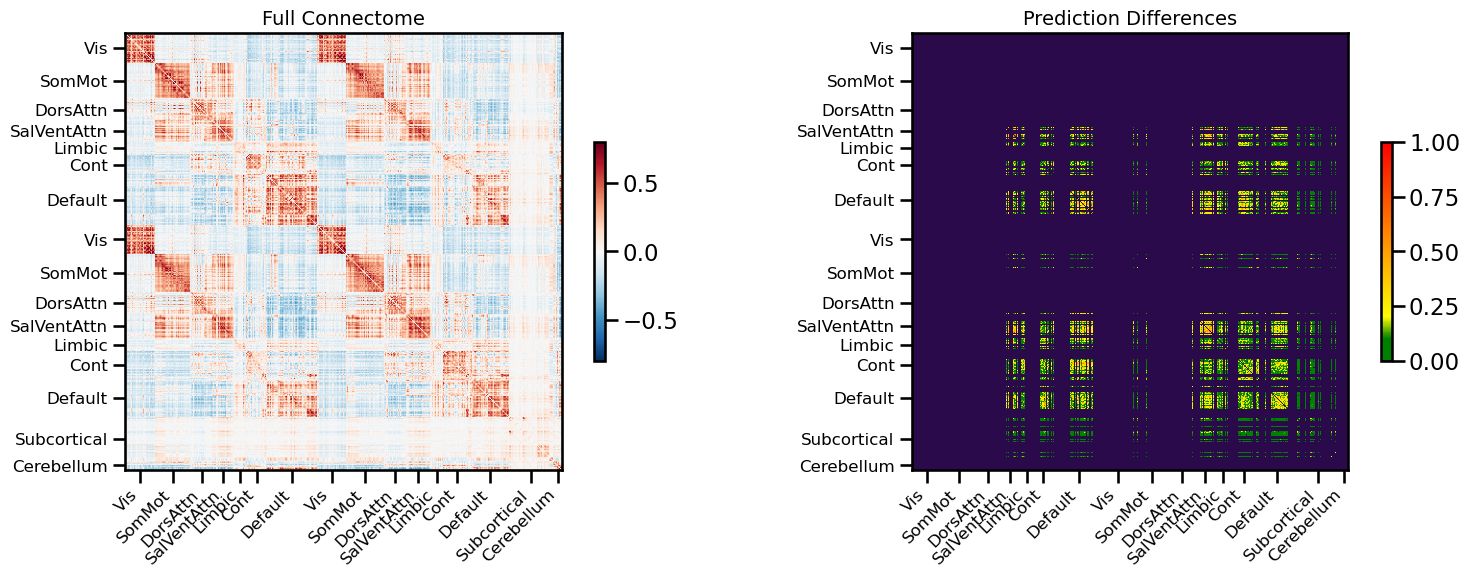

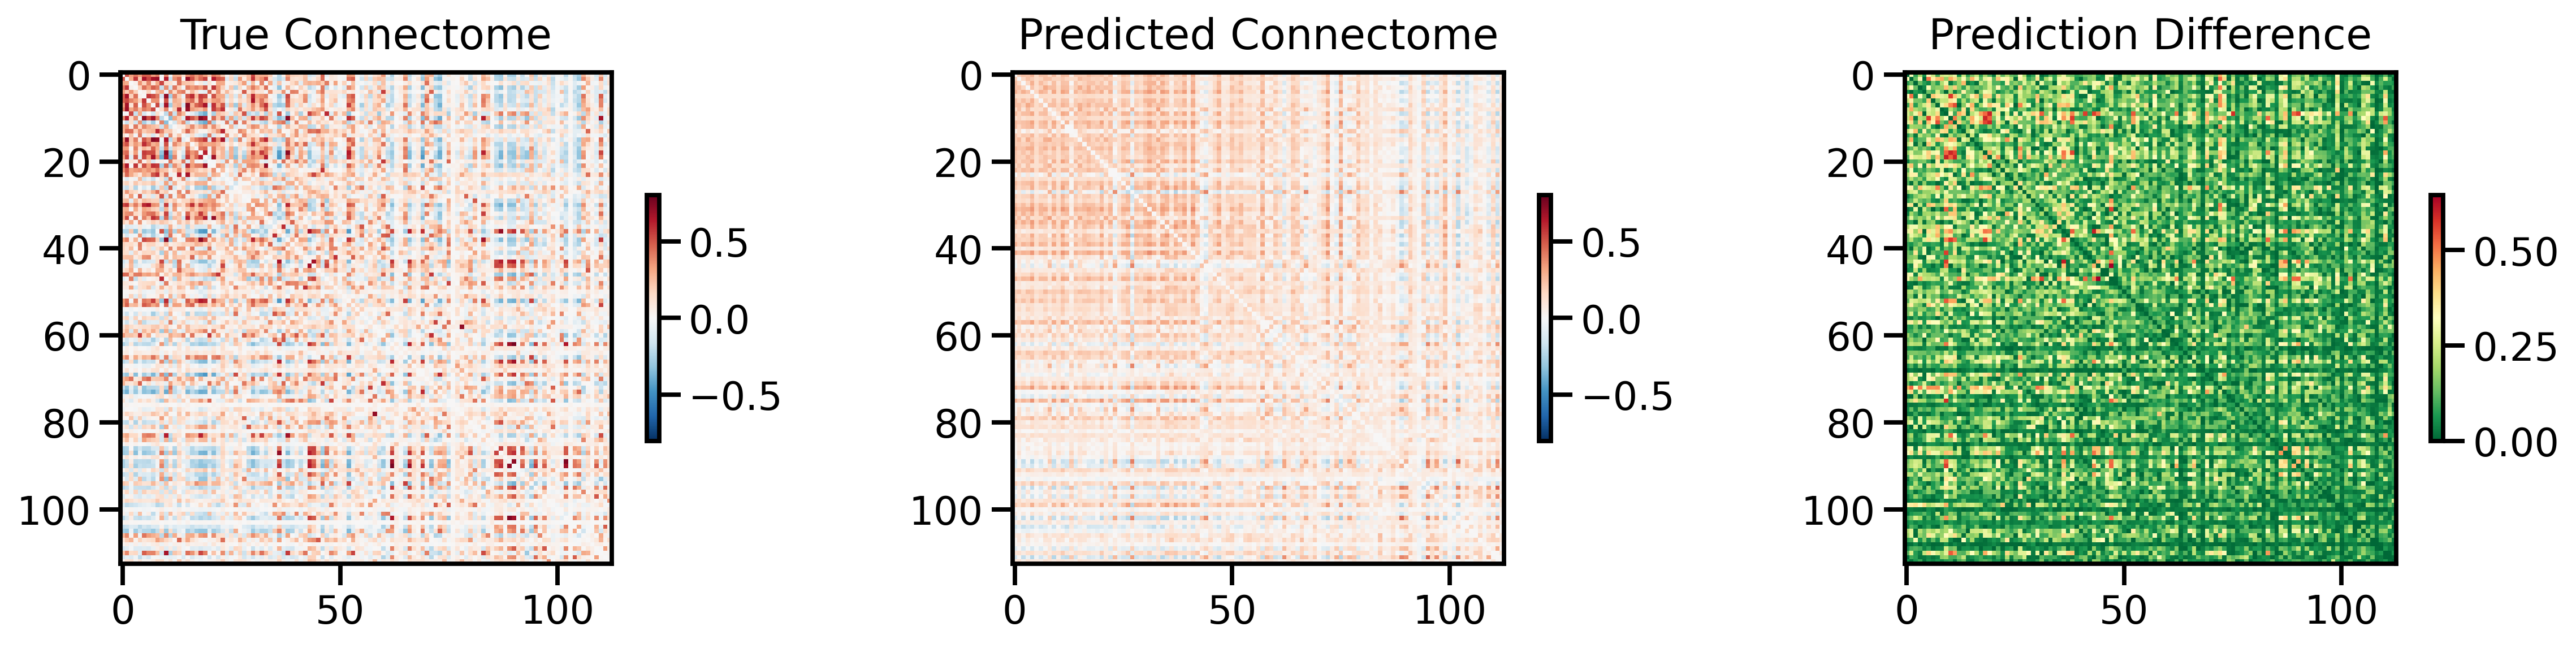

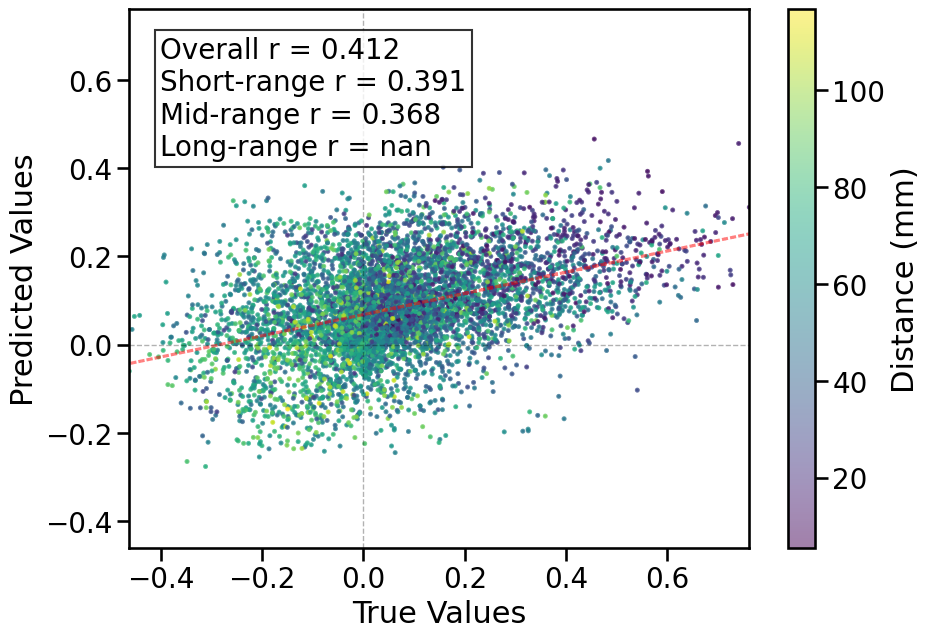

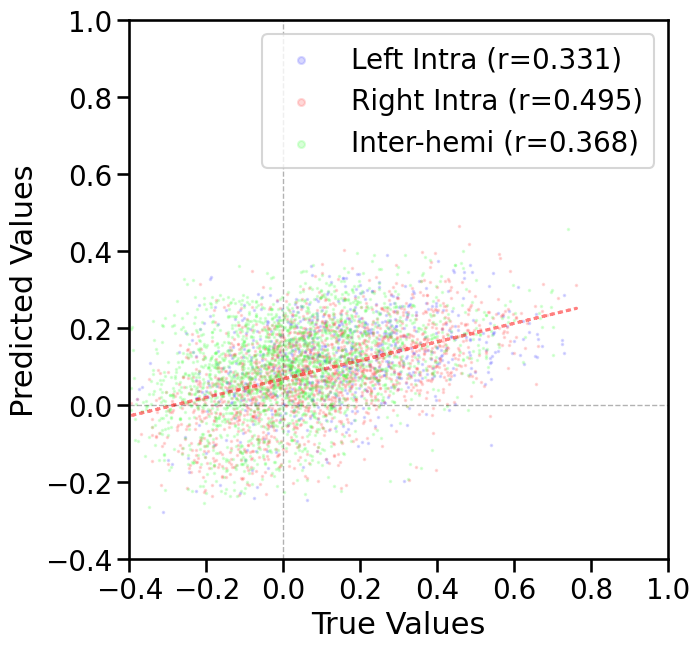

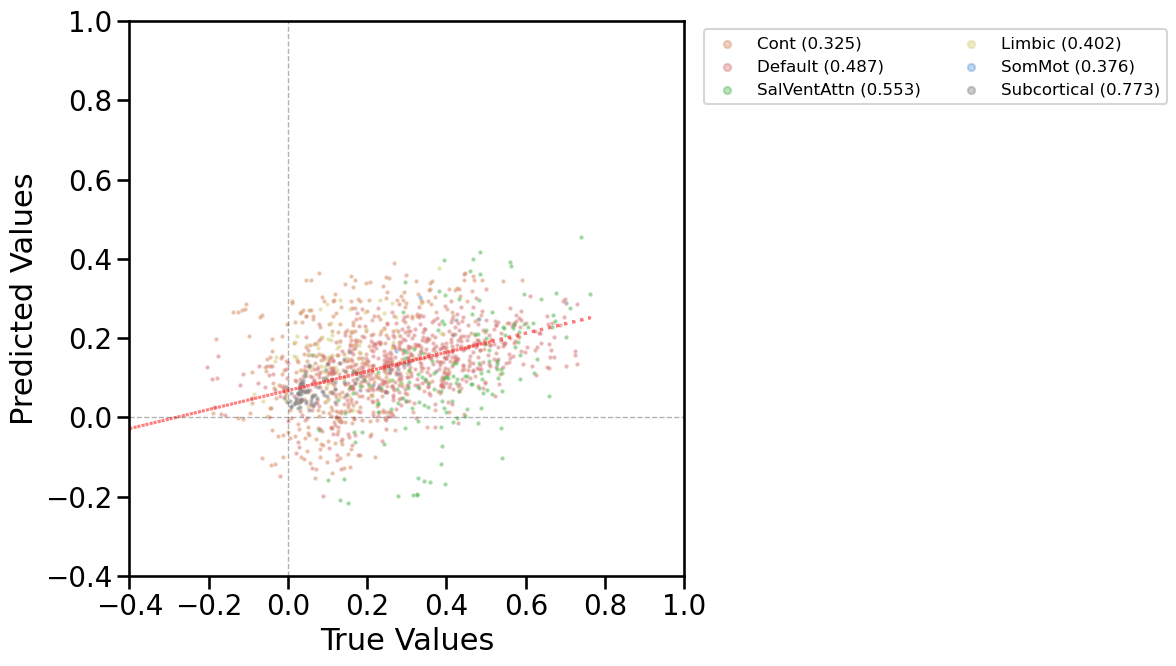


TRAIN METRICS: {'mse': 0.010569362, 'mae': 0.073642075, 'r2': 0.7190522591663107, 'pearson_r': 0.8500257267286243, 'short_r': 0.860130325137307, 'mid_r': 0.8289134963005008, 'long_r': 0.7899742725986622, 'left_hemi_r': 0.8349868843723361, 'right_hemi_r': 0.8559745757821341, 'inter_hemi_r': 0.8587055357713527, 'Cont_r': 0.6229506577599307, 'Default_r': 0.7324623954684527, 'SalVentAttn_r': 0.742880646947577, 'Limbic_r': 0.45502337194089437, 'DorsAttn_r': 0.6162589425457958, 'SomMot_r': 0.6298571637378356, 'Vis_r': 0.7210344729165366, 'Subcortical_r': 0.7995370097629471, 'Cerebellum_r': 0.7613562518992267, 'geodesic_distance': 20.212751578132362}
TEST METRICS: {'mse': 0.029324034, 'mae': 0.13017115, 'r2': 0.13162290858001913, 'pearson_r': 0.4119938594414777, 'short_r': 0.39114381382509705, 'mid_r': 0.3682979850041349, 'long_r': nan, 'left_hemi_r': 0.33061914425694144, 'right_hemi_r': 0.4948769040910321, 'inter_hemi_r': 0.3681211160248207, 'Cont_r': 0.32467222628507175, 'Default_r': 0.487

47177

In [18]:
single_sim_run(
              feature_type=[{'transcriptome': None}],
              use_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              parcellation='S400',
              hemisphere='both',
              connectome_target='FC',
              binarize=False,
              impute_strategy='mirror_interpolate',
              sort_genes='refgenome',
              gene_list='0.2',
              cv_type='spatial',
              random_seed=9,
              search_method=('wandb', 'mse', 5),
              track_wandb=False,
              skip_cv=True,
              model_type='bilinear_lowrank',
              use_gpu=True, 
              null_model='none',
              use_folds=[0]
              )

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Clear CPU memory
gc.collect()